# Regressão Logística I
## Tarefa I

Neste exercício vamos trabalhar com a base "Heart Disease Data Set" disponível no site do [UCI](https://archive.ics.uci.edu/ml/datasets/heart+disease).

Temos 303 indivíduos e vamos utilizar 13 variáveis disponíveis para prever a presença de doença cardíaca na variável ```num```(a 14$^a$ variável).

A descrição das variáveis está recortada abaixo:
- age: idade do paciente em anos
- sex: sexo (1 = male; 0 = female)  
- cp: tipo de dor no peito
  - 1: angina típica
  - 2: angina atípica
  - 3: dor não-angina
  - 4: assintomático
- trestbps: pressão sanguínea em repouso (em mm Hg na admissão ao hospital
- chol: colesterol sérico em mg/dl
- fbs: (açúcar no sangue em jejum > 120 mg/dl) (1 = True; 0 = False)
- restecg: resultados eletrocardiográficos em repouso
  - 0: normal
  - 1: tendo anormalidade da onda ST-T (Inversões de onda T e / ou ST com elevação ou depressão de > 0.05 mV)
  - 2: mostrando hipertrofia ventricular esquerda provável ou definitiva pelos critérios de Estes
- thalach: frequência cardíaca máxima alcançada
- exang: angina induzida por exercício(1 = sim; 0 = não)
- oldpeak = Depressão de ST induzida por exercício em relação ao repouso
- slope: Depressão de ST induzida por exercício em relação ao repouso
  - 1: inclinação ascendente
  - 2: estável
  - 3: inclinação descendente
- ca: número de vasos principais (0-3) coloridos por fluorosopia
- thal: 3 = normal; 6 = defeito corrigido; 7 = defeito reversível
- num: diagnóstico de doença cardíaga (status de doença angiográfica)

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.formula.api as smf

from IPython.display import display


In [5]:
# Ler a base
colunas = ['age','sex','cp','trestbps','chol','fbs','restecg',
           'thalach','exang','oldpeak','slope','ca','thal','num']

caminho_local = r"C:\Users\Priscila\Desktop\EBAC - DATA SCIENCE\Desenvolvimento Modelos com Pandas e Python\Regressão Logística I\Pratique I\processed.cleveland.data"
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"

try:
    df = pd.read_csv(caminho_local, header=None, names=colunas, na_values='?')
except FileNotFoundError:
    df = pd.read_csv(url, header=None, names=colunas, na_values='?')

# Garantir números
for c in colunas:
    df[c] = pd.to_numeric(df[c], errors='coerce')

# Criar o alvo binário (0 = saudável, 1 = doente)
df['flag_doente'] = (df['num'] != 0).astype('int64')

df


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,flag_doente
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2,1
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3,1
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1,1


1. Monte uma bivariada para a variável ```sex``` com as seguintes estatísticas:

- Número de *saudáveis*
- Número de *doentes*
- Total
- Quantidade média de doentes
- *Odds*
- *Odds ratio* (Use o total como referência)
- Logito (LOG(*Odds*))
- O LOG do *Odds ratio* (com o total como referência) é chamado de *Weight of Evidence* (WOE). Calcule-o.

In [14]:
# Bivariada para 'sex'
eps = 1e-9  # só pra evitar divisão por zero em casos extremos

tab = df.groupby('sex')['flag_doente'].agg(doentes='sum', total='count')
tab['saudaveis'] = tab['total'] - tab['doentes']
tab['media_doentes'] = tab['doentes'] / tab['total']

# Odds por categoria (p/(1-p) = doentes/saudaveis)
tab['odds'] = (tab['doentes'] + eps) / (tab['saudaveis'] + eps)

# Odds total (referência)
doentes_total = df['flag_doente'].sum()
total_total = df['flag_doente'].count()
saudaveis_total = total_total - doentes_total
odds_total = (doentes_total + eps) / (saudaveis_total + eps)

# Odds Ratio usando o total como referência
tab['odds_ratio_ref_total'] = tab['odds'] / odds_total

# Logito (LOG(Odds)) e WOE (LOG(Odds Ratio))
tab['logito'] = np.log(tab['odds'])
tab['woe'] = np.log(tab['odds_ratio_ref_total'])

# Organizar no formato pedido e deixar mais legível
bivariada_sex = tab[['saudaveis','doentes','total','media_doentes',
                     'odds','odds_ratio_ref_total','logito','woe']].reset_index()

bivariada_sex['sex'] = bivariada_sex['sex'].map({0: 'female', 1: 'male'})

# Linha Total (referência)
linha_total = pd.DataFrame([{
    'sex': 'Total',
    'saudaveis': saudaveis_total,
    'doentes': doentes_total,
    'total': total_total,
    'media_doentes': doentes_total / total_total,
    'odds': odds_total,
    'odds_ratio_ref_total': 1.0,
    'logito': np.log(odds_total),
    'woe': 0.0
}])

bivariada_sex = pd.concat([bivariada_sex, linha_total], ignore_index=True)

print(f"Odds total (referência): {odds_total:.6f}")
bivariada_sex.head()



Odds total (referência): 0.847561


,sex,saudaveis,doentes,total,media_doentes,odds,odds_ratio_ref_total,logito,woe
0,female,72,25,97,0.257732,0.347222,0.409672,-1.057790,-0.892398
1,male,92,114,206,0.553398,1.239130,1.461996,0.214410,0.379802
2,Total,164,139,303,0.458746,0.847561,1.000000,-0.165392,0.000000


2. Monte uma bivariada para a variável ```age``` com as seguintes estatísticas:
- Categorize a variável em 5 grupos
- Calcule as mesmas quantidades calculadas no execício anterior
- Calcule também o valor médio da variável ```age```

In [11]:

eps = 1e-9  # só pra evitar divisão por zero em casos extremos

# Criar 5 grupos (quintis) para age
df['faixa_idade'] = pd.qcut(df['age'], q=5)

# Calcular a bivariada por faixa
tab_age = df.groupby('faixa_idade', observed=False).agg(
    doentes=('flag_doente', 'sum'),
    total=('flag_doente', 'count'),
    media_age=('age', 'mean')
)
tab_age['saudaveis'] = tab_age['total'] - tab_age['doentes']
tab_age['media_doentes'] = tab_age['doentes'] / tab_age['total']
tab_age['odds'] = (tab_age['doentes'] + eps) / (tab_age['saudaveis'] + eps)

# Odds total
doentes_total = df['flag_doente'].sum()
total_total = df['flag_doente'].count()
saudaveis_total = total_total - doentes_total
odds_total = (doentes_total + eps) / (saudaveis_total + eps)

# OR, Logito e WOE
tab_age['odds_ratio_ref_total'] = tab_age['odds'] / odds_total
tab_age['logito'] = np.log(tab_age['odds'])
tab_age['woe'] = np.log(tab_age['odds_ratio_ref_total'])

# Montar o dataframe final
bivariada_age = tab_age[['media_age','saudaveis','doentes','total','media_doentes',
                         'odds','odds_ratio_ref_total','logito','woe']].reset_index()

# Linha Total
linha_total = pd.DataFrame([{
    'faixa_idade': 'Total',
    'media_age': df['age'].mean(),
    'saudaveis': saudaveis_total,
    'doentes': doentes_total,
    'total': total_total,
    'media_doentes': doentes_total / total_total,
    'odds': odds_total,
    'odds_ratio_ref_total': 1.0,
    'logito': np.log(odds_total),
    'woe': 0.0
}])

bivariada_age = pd.concat([bivariada_age, linha_total], ignore_index=True)

display(bivariada_age.head())  # mostrar em dataframe (tabela)
print(f"Média geral de age: {df['age'].mean():.2f}")


,faixa_idade,media_age,saudaveis,doentes,total,media_doentes,odds,odds_ratio_ref_total,logito,woe
0,"(28.999, 45.0]",41.222222,47,16,63,0.253968,0.340426,0.401653,-1.077559,-0.912166
1,"(45.0, 53.0]",50.000000,42,22,64,0.343750,0.523810,0.618020,-0.646627,-0.481235
2,"(53.0, 58.0]",56.211268,32,39,71,0.549296,1.218750,1.437950,0.197826,0.363218
3,"(58.0, 62.0]",60.355556,13,32,45,0.711111,2.461538,2.904261,0.900787,1.066179
4,"(62.0, 77.0]",66.516667,30,30,60,0.500000,1.000000,1.179856,0.000000,0.165392


Média geral de age: 54.44


3. Visualize a informação da bivariada construída acima através de um gráfico da sua escolha.

,faixa_idade,media_age,media_doentes,odds_ratio_ref_total,woe
0,"(28.999, 45.0]",41.222222,0.253968,0.401653,-0.912166
1,"(45.0, 53.0]",50.000000,0.343750,0.618020,-0.481235
2,"(53.0, 58.0]",56.211268,0.549296,1.437950,0.363218
3,"(58.0, 62.0]",60.355556,0.711111,2.904261,1.066179
4,"(62.0, 77.0]",66.516667,0.500000,1.179856,0.165392


Faixa com MAIOR WOE: (58.0, 62.0] | WOE = 1.066179


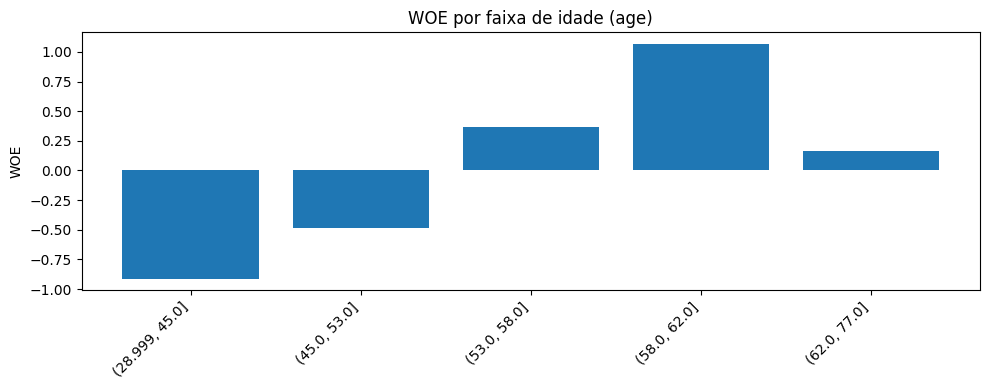

In [13]:
# tirar a linha Total, se existir
plot_age = bivariada_age[bivariada_age['faixa_idade'] != 'Total'].copy()

# ordenar pelas faixas 
plot_age = plot_age.sort_values('faixa_idade')

# mostrar em dataframe (tabela)
display(plot_age[['faixa_idade','media_age','media_doentes','odds_ratio_ref_total','woe']].head())

# print com valor final
idx_max = plot_age['woe'].idxmax()
print(f"Faixa com MAIOR WOE: {plot_age.loc[idx_max, 'faixa_idade']} | WOE = {plot_age.loc[idx_max, 'woe']:.6f}")

# gráfico
plt.figure(figsize=(10, 4))
plt.bar(plot_age['faixa_idade'].astype(str), plot_age['woe'])
plt.xticks(rotation=45, ha='right')
plt.ylabel('WOE')
plt.title('WOE por faixa de idade (age)')
plt.tight_layout()
plt.show()
